In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import scipy.stats as stats
from scipy.signal import medfilt
from matplotlib.colors import LogNorm

%matplotlib inline

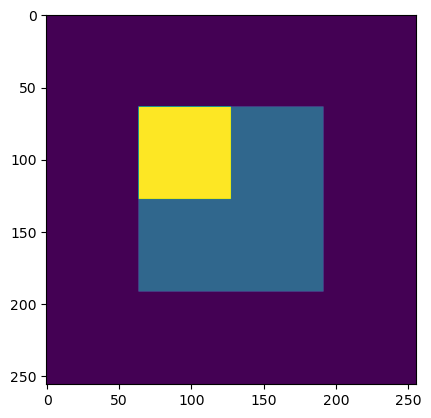

In [2]:
N=256
ph=np.zeros([N,N]);

ph[int(N/4):int(3*N/4),int(N/4):int(3*N/4)]=1;

ph[int(N/4):int(N/2),int(N/4):int(N/2)]=3;

plt.imshow(ph)

In [3]:
M=5;
fph=ndimage.uniform_filter(ph,[M,M]);

np.random.seed(10)
w=0.25*np.random.normal(0,1,fph.shape);


wfph=w+fph;
th=[0.6, 2.2];

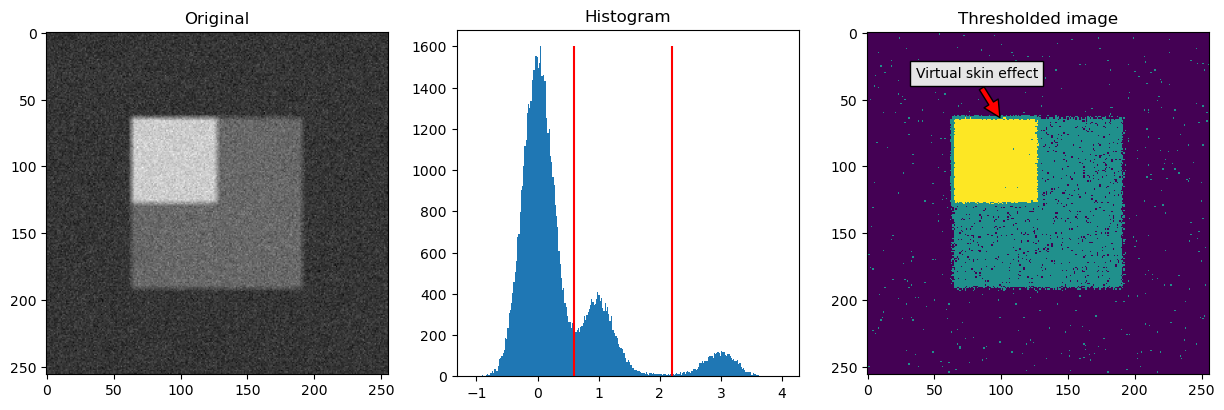

In [4]:
fig,ax = plt.subplots(1,3,figsize=[15,4.5])
ax=ax.ravel()
ax[0].imshow(wfph,cmap='gray'), 
ax[0].set_title('Original')

h=ax[1].hist(wfph.ravel(),bins=256);
th=[0.6, 2.2];
ax[1].vlines([th[0]],ymin=0,ymax=h[0].max(),color='r')
ax[1].vlines([th[1]],ymin=0,ymax=h[0].max(),color='r')
ax[1].set_title('Histogram')

s=(wfph<th[0]).astype(int);
s=2-(s+(wfph<th[1]))
ax[2].imshow(s,interpolation='none')
ax[2].set_title('Thresholded image')
ax[2].annotate('Virtual skin effect', xy=(100, 65),  xycoords='data',
            xytext=(0.5, 0.9), textcoords='axes fraction',
            arrowprops=dict(facecolor='red', shrink=0.05),
               bbox=dict(fc="0.9"),
            horizontalalignment='right', verticalalignment='top',
            )
plt.savefig('figures/multithreshold.svg')
plt.savefig('figures/multithreshold.pdf')

In [ ]:
fig,ax = plt.subplots(1,3,figsize=(15,4.5))
ax[0].imshow(wfph,cmap='gray')
ax[0].set_title('Original')
ax[0].plot([50,80],[100,100],lw=4,label='Class 1 to 3')
ax[0].plot([110,140],[100,100],lw=4,label='Class 2 to 3')
ax[0].plot([50,80],[160,160],lw=4,label='Class 1 to 2')
ax[0].legend()

p13=wfph[100:110,50:80].mean(axis=0)
p23=wfph[100:110,110:140].mean(axis=0)
p12=wfph[160:170,50:80].mean(axis=0)

ax[1].plot(p13,label='Class 1 to 3')
ax[1].plot(p23,label='Class 2 to 3')
ax[1].plot(p12,label='Class 1 to 2')
ax[1].fill_between(np.arange(30),np.ones(30)*2.2,np.ones(30)*3.5,alpha=0.2)
ax[1].fill_between(np.arange(30),np.ones(30)*0.6,np.ones(30)*2.199,alpha=0.2)
ax[1].fill_between(np.arange(30),np.ones(30)*0.6,np.ones(30)*-0.1,alpha=0.2)
ax[1].hlines([2.2],xmin=0,xmax=29,linestyle='--')
ax[1].hlines([0.6],xmin=0,xmax=29,linestyle='--')
ax[1].legend()
ax[1].set_title('Profiles and threshold levels')
ax[1].set_xlabel('Position')
ax[1].set_ylabel('Pixel intensity')

def multithres(p,th) :
    s=(p<th[0]).astype(int);
    s=2-(s+(p<th[1]))

    return s

ax[2].plot(multithres(p13,th),label='Class 1 to 3')
ax[2].plot(multithres(p23,th),label='Class 2 to 3')
ax[2].plot(multithres(p12,th),label='Class 1 to 2')
ax[2].legend()
ax[2].annotate('Misclassified', xy=(13, 1),  xycoords='data',
            xytext=(0.35, 0.65), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )
ax[2].set_xlabel('Position')
ax[2].set_ylabel('Class')
ax[2].set_yticks([0,1,2])
ax[2].set_yticklabels([1,2,3])
ax[2].set_title('Class assignments');
plt.savefig('figures/MultiClassProfiles.svg')
plt.savefig('figures/MultiClassProfiles.pdf')

/var/folders/hj/l3z3z7bj663f4wp4vlx69lt40000nw/T/ipykernel_51552/2757801966.py:18: DeprecationWarning: Please use `gaussian_gradient_magnitude` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  e=ndimage.filters.gaussian_gradient_magnitude(wfph,sigma=1.0)


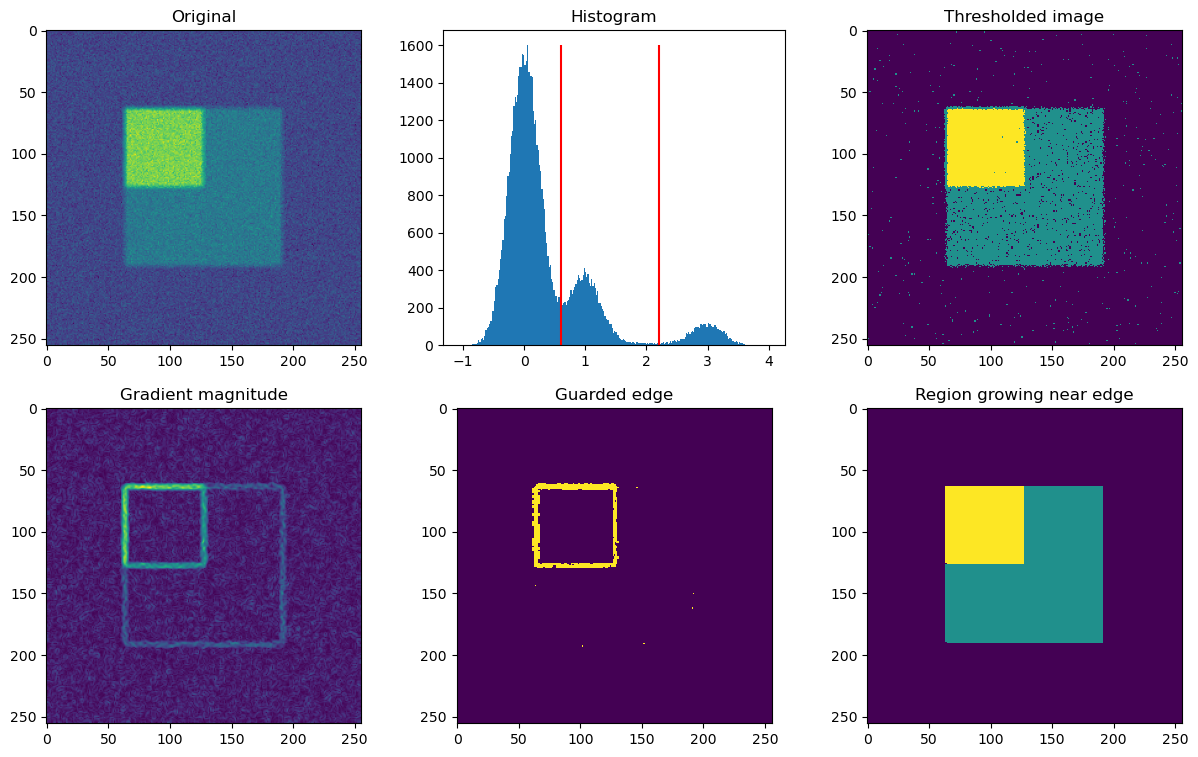

In [5]:

fig,ax = plt.subplots(2,3,figsize=[15,9])
ax=ax.ravel()
ax[0].imshow(wfph), 
ax[0].set_title('Original')

h=ax[1].hist(wfph.ravel(),bins=256);
th=[0.6, 2.2];
ax[1].vlines([th[0]],ymin=0,ymax=h[0].max(),color='r')
ax[1].vlines([th[1]],ymin=0,ymax=h[0].max(),color='r')
ax[1].set_title('Histogram')

s=(wfph<th[0]).astype(int);
s=2-(s+(wfph<th[1]))
ax[2].imshow(s,interpolation='none')
ax[2].set_title('Thresholded image')


e=ndimage.filters.gaussian_gradient_magnitude(wfph,sigma=1.0)
ax[3].imshow(e)
ax[3].set_title('Gradient magnitude')


s2=s;
s2[0.3<e]=3
ax[4].imshow(0.3<e,interpolation='none')
ax[4].set_title('Guarded edge')

a=plt.imread('figures/gradientseg.png')
ax[5].imshow(a,interpolation='none')
ax[5].set_title('Region growing near edge')

plt.savefig('figures/guardededge_demo.pdf')
plt.savefig('figures/guardededge_demo.svg')

In [6]:
H,ex,ey=np.histogram2d(np.reshape(wfph,[np.prod(wfph.shape)]), np.reshape(e,[np.prod(e.shape)]), bins=100)

In [ ]:
plt.imshow(H+1,norm=LogNorm())
plt.colorbar()